In [9]:
# main libraries
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# graphical libraries
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image as mg
import cv2

# data science & deep learning libraries
import numpy as np
import tensorflow as tf

# our utils
from util_functions import util_functions

In [21]:
# constants
TRAIN_SIZE = 1000
TEST_SIZE = 650
WILD_PATH = 'images/auto_coder_data/train/wild'
IMAGE_SIZE = 227

### Getting Images

In [22]:
# getting list of names if wild images
images = os.listdir(WILD_PATH)

In [23]:
# function to read images and return them in a list
def get_images(start_index=0, end_index=TRAIN_SIZE):
    data = []
    for i in range(start_index, end_index):
        IMAGE_PATH = WILD_PATH + '/' + images[i]
        # image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(IMAGE_PATH)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        
        # normailize images pixels values
        norm_image = image / 255.0
        data.append(norm_image)
    return data

train_data = get_images(0, TRAIN_SIZE)
test_data = get_images(TRAIN_SIZE, TRAIN_SIZE + TEST_SIZE)

In [24]:
print(f'Size of train data images: {len(train_data)}')
print(f'Size of test data images: {len(test_data)}')

Size of train data images: 1000
Size of test data images: 650


### Show Random Train Image:

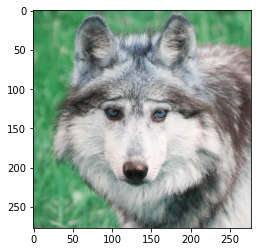

In [33]:
random_image_index = np.random.randint(0, TRAIN_SIZE)
random_image = train_data[random_image_index]
plt.imshow(random_image)

### Convolutional Layers:

In [26]:
# Building an encoder due to AlexNet from 2012
model = tf.keras.models.Sequential([
    
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    
    # 2nd conv
  tf.keras.layers.Conv2D(256, (5,5),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    
  # To Flatten layer
  tf.keras.layers.Flatten()
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 67, 67, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 67, 67, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 33, 33, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 33, 33, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 384)      